# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=1))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Sierra Leone,Belize,Bhutan,Gambia,Western Sahara,Malawi,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-01,213372,104118,110574,77872,57749,82361,47593,29865,15679,17768,...,2,3,4,4,0,0,2,1,0,1
2020-04-02,243453,112065,115242,84794,59929,82432,50468,34173,18135,18827,...,2,3,5,4,0,3,3,1,0,1
2020-04-03,275586,119199,119827,91159,65202,82511,53183,38689,20921,19606,...,2,4,5,4,0,3,3,1,0,1
2020-04-04,308850,126168,124632,96092,90848,82543,55743,42477,23934,20505,...,4,4,5,4,0,4,3,1,0,1
2020-04-05,337072,131646,128948,100123,93773,82602,58226,48436,27069,21100,...,6,5,5,4,4,4,3,1,1,1


'chg in cases'

Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Sierra Leone,Belize,Bhutan,Gambia,Western Sahara,Malawi,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,30081.0,7947.0,4668.0,6922.0,2180.0,71.0,2875.0,4308.0,2456.0,1059.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
2020-04-03,32133.0,7134.0,4585.0,6365.0,5273.0,79.0,2715.0,4516.0,2786.0,779.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,33264.0,6969.0,4805.0,4933.0,25646.0,32.0,2560.0,3788.0,3013.0,899.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-04-05,28222.0,5478.0,4316.0,4031.0,2925.0,59.0,2483.0,5959.0,3135.0,595.0,...,2.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0


'deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Netherlands,Germany,Belgium,...,Maldives,Saint Lucia,Somalia,Guinea-Bissau,Malta,Guinea,Grenada,Fiji,Eswatini,South Sudan
2020-04-01,13155,9387,4757,4043,2357,3036,3316,1175,920,828,...,0,0,0,0,0,0,0,0,0,0
2020-04-02,13915,10348,5926,5398,2926,3160,3322,1341,1107,1011,...,0,0,0,0,0,0,0,0,0,0
2020-04-03,14681,11198,7087,6520,3611,3294,3326,1490,1275,1143,...,0,0,0,0,0,0,0,0,0,0
2020-04-04,15362,11947,8407,7574,4320,3452,3330,1656,1444,1283,...,0,0,0,0,0,0,0,0,0,0
2020-04-05,15887,12641,9619,8093,4943,3603,3333,1771,1584,1447,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,Italy,Spain,US,France,United Kingdom,Iran,China,Netherlands,Germany,Belgium,...,Maldives,Saint Lucia,Somalia,Guinea-Bissau,Malta,Guinea,Grenada,Fiji,Eswatini,South Sudan
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,760.0,961.0,1169.0,1355.0,569.0,124.0,6.0,166.0,187.0,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,766.0,850.0,1161.0,1122.0,685.0,134.0,4.0,149.0,168.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,681.0,749.0,1320.0,1054.0,709.0,158.0,4.0,166.0,169.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-05,525.0,694.0,1212.0,519.0,623.0,151.0,3.0,115.0,140.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,Germany,France,China,Iran,United Kingdom,Turkey,Switzerland,...,Sierra Leone,Belize,Bhutan,Gambia,Western Sahara,Malawi,Burundi,Papua New Guinea,South Sudan,Timor-Leste
2020-04-01,2.23,9.02,11.90,1.18,7.00,4.03,6.38,7.89,1.77,2.75,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-02,2.43,9.23,12.07,1.31,9.01,4.03,6.26,8.56,1.96,2.85,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,2.57,9.39,12.25,1.40,10.00,4.03,6.19,9.33,2.03,3.01,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,2.72,9.47,12.33,1.50,8.34,4.03,6.19,10.17,2.09,3.25,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-05,2.85,9.60,12.32,1.58,8.63,4.04,6.19,10.21,2.12,3.39,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0


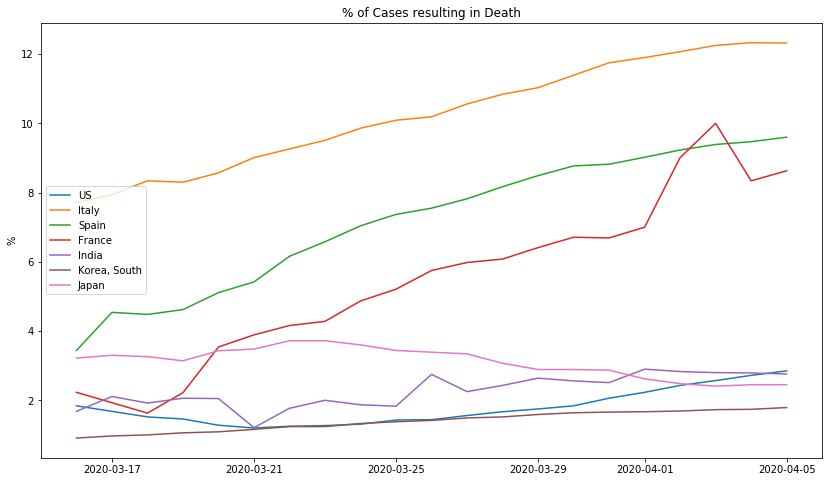

In [189]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France','India','Korea, South','Japan']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-05 00:00:00 %
Country/Region,
Italy,12.32
San Marino,12.03
Congo (Kinshasa),11.69
Algeria,11.52
United Kingdom,10.21
Netherlands,9.86
Spain,9.60
Indonesia,8.71
France,8.63


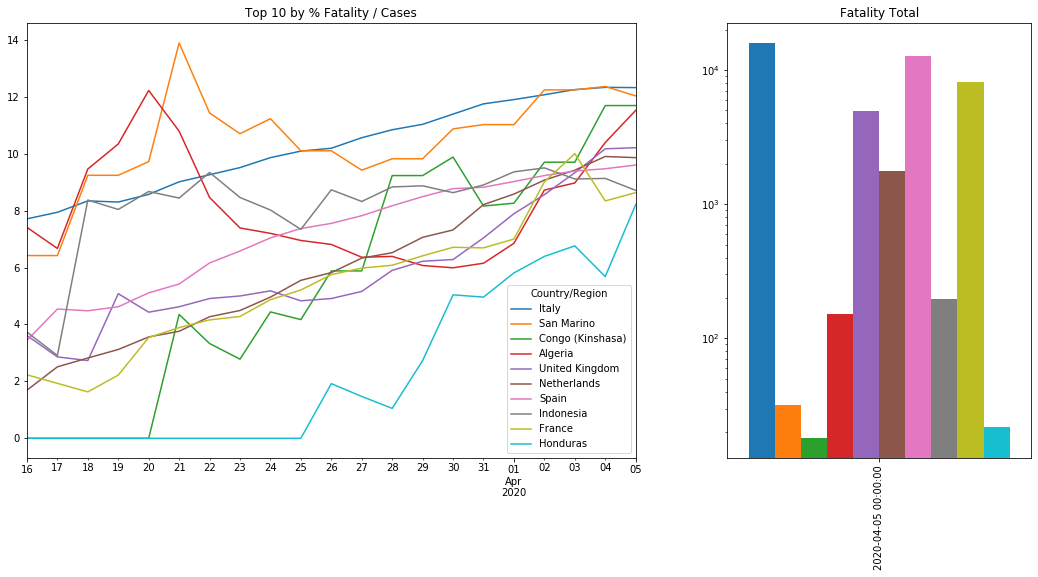

In [190]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [191]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-01,2470.500000,2498.080078,2522.750000,2447.489990,213372,47593,110574,104118,82361,2178,907673
2020-04-02,2526.899902,2458.540039,2533.219971,2455.790039,243453,50468,115242,112065,82432,2495,985770
2020-04-03,2488.649902,2514.919922,2538.179932,2459.959961,275586,53183,119827,119199,82511,2617,1065911
2020-04-04,NaN,NaN,NaN,NaN,308850,55743,124632,126168,82543,3139,1164780
2020-04-05,NaN,NaN,NaN,NaN,337072,58226,128948,131646,82602,3139,1237095


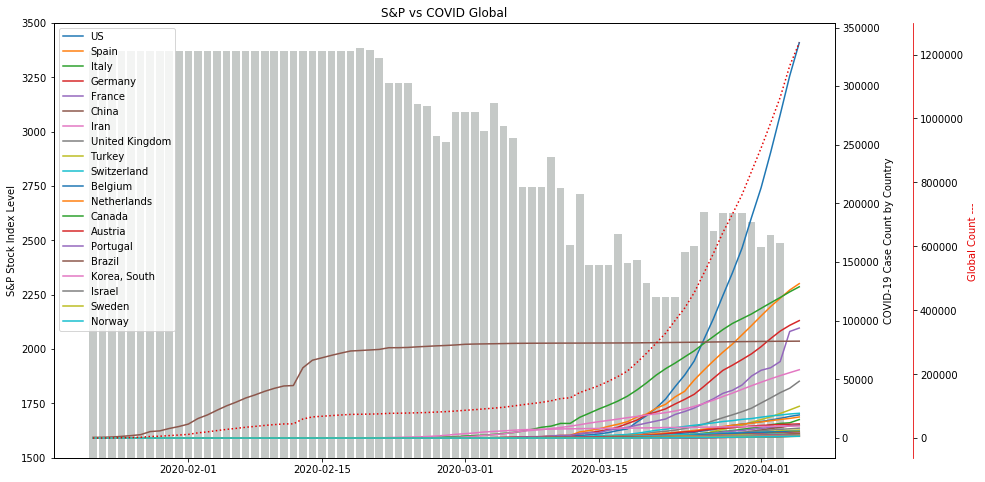

In [192]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

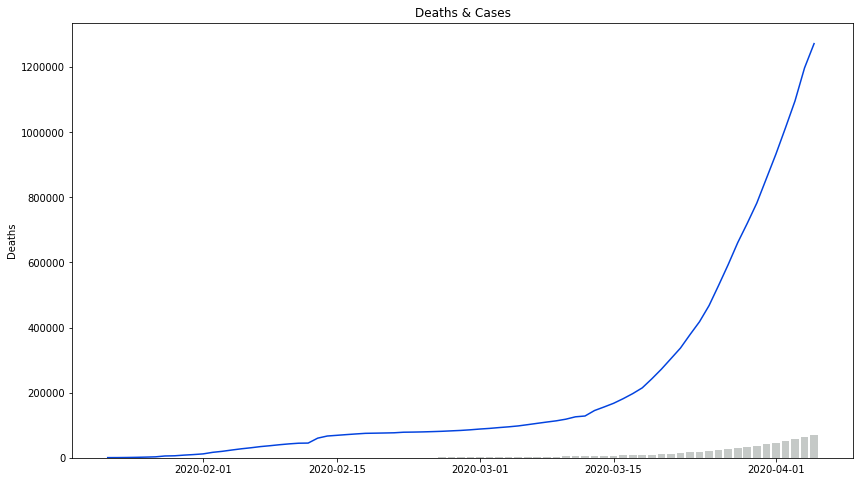

In [193]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [194]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])

'top countries'

,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05
Country/Region,,,,,,,,,,
US,101657,121478,140886,161807,188172,213372,243453,275586,308850,337072
Spain,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646
Italy,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948
Germany,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123
France,33402,38105,40708,45170,52827,57749,59929,65202,90848,93773
China,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602
Iran,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226
United Kingdom,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436
Turkey,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069


## Random analysis of various countries

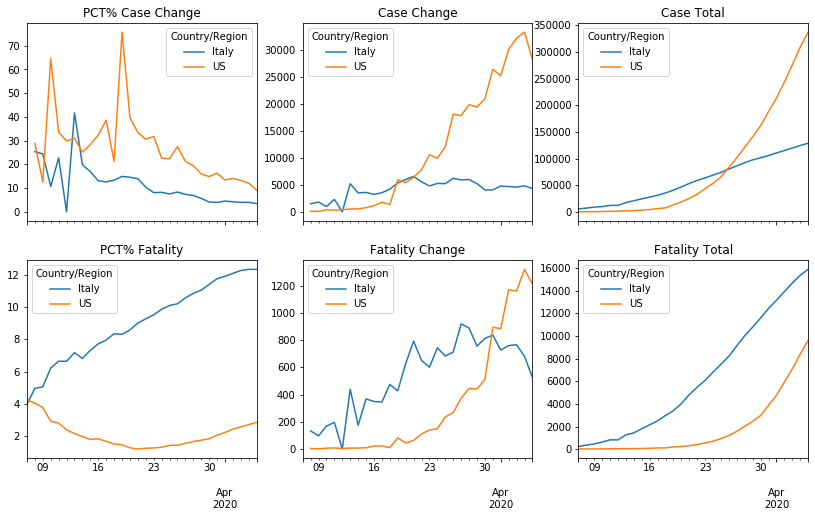

In [213]:
# ad hoc overlays
countries = ['Italy','US','Spain','France','Germany']
countries = ['Italy','US']
maxdays = 30

fig, axs = plt.subplots(2,3, figsize=(14, 8), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Case Change')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Case Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]) .transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Fatality Change')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Fatality Total')
plt.show()


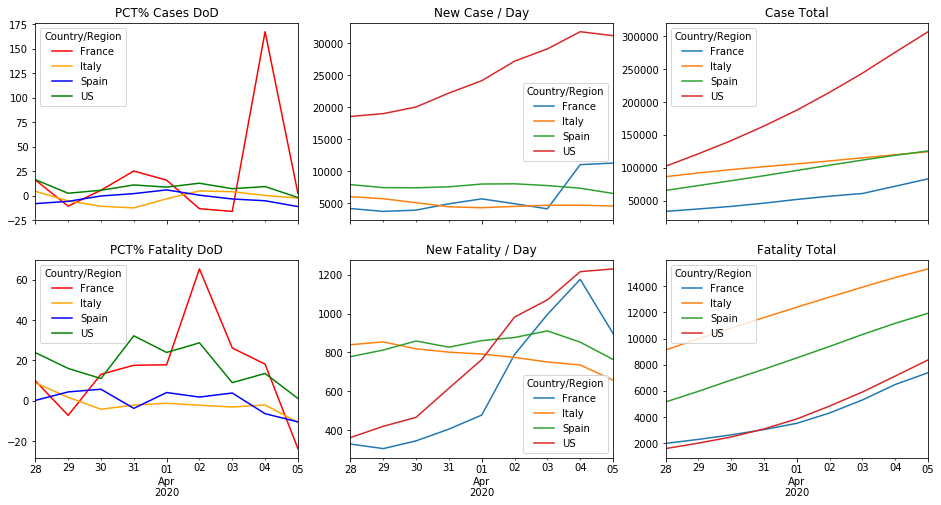

Country/Region,France,Italy,Spain,US
2020-03-28,0.160019,0.044106,-0.081830,0.162427
2020-03-29,-0.107797,-0.054517,-0.058853,0.024237
2020-03-30,0.054764,-0.108713,-0.003897,0.054338
2020-03-31,0.251020,-0.126042,0.020282,0.108795
2020-04-01,0.157519,-0.032658,0.058181,0.086844
2020-04-02,-0.133912,0.047963,0.004207,0.126369
2020-04-03,-0.161529,0.039399,-0.034551,0.070646
2020-04-04,1.674667,0.001639,-0.052672,0.092251
2020-04-05,0.022508,-0.025039,-0.111973,-0.019470


Country/Region,France,Italy,Spain,US
2020-03-28,0.099441,0.089023,0.002146,0.238857
2020-03-29,-0.072154,0.017460,0.044111,0.160517
2020-03-30,0.131435,-0.041732,0.057424,0.110493
2020-03-31,0.176186,-0.021164,-0.037238,0.322119
2020-04-01,0.178601,-0.012058,0.041096,0.239848
2020-04-02,0.653631,-0.021886,0.018576,0.287336
2020-04-03,0.261824,-0.030551,0.038754,0.090231
2020-04-04,0.181727,-0.020417,-0.063643,0.135657
2020-04-05,-0.236760,-0.106479,-0.104297,0.011781


In [212]:
# rolling 3 day to smooth out 
countries = ['France','Italy','US','Spain']
maxdays = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=True, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays).plot(ax=axs[0,2], title='Case Total')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays).plot(ax=axs[1,2], title='Fatality Total')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))


# Rival Countries

Country/Region,India,Pakistan
2020-04-01,1998,2118
2020-04-02,2543,2421
2020-04-03,2567,2686
2020-04-04,3082,2818
2020-04-05,3588,3157


Country/Region,India,Pakistan
2020-04-01,58,27
2020-04-02,72,34
2020-04-03,72,40
2020-04-04,86,41
2020-04-05,99,47


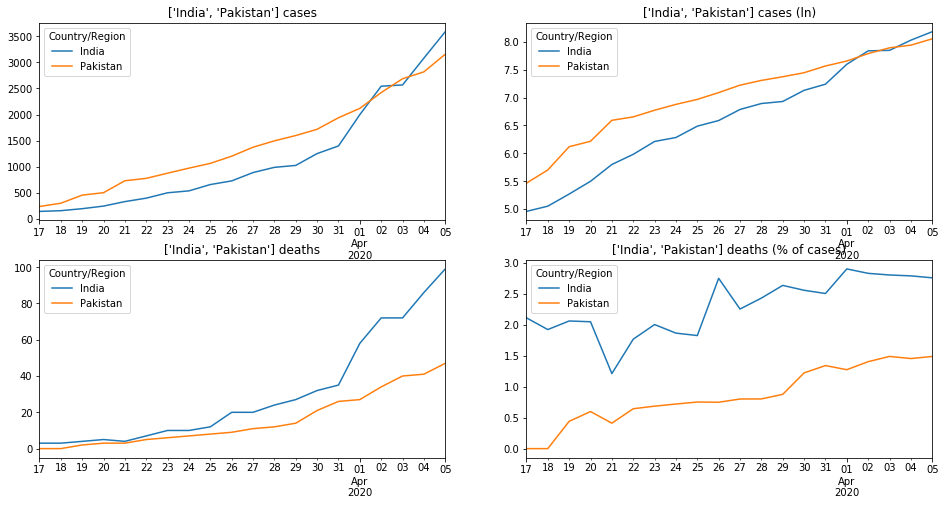

In [197]:
maxdays = 20
countries = ['India','Pakistan']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-01,13964,13696,2319
2020-04-02,15348,14788,2487
2020-04-03,16770,15821,2612
2020-04-04,18431,16727,2729
2020-04-05,19691,17953,2804


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-01,828,1175,29
2020-04-02,1011,1341,30
2020-04-03,1143,1490,31
2020-04-04,1283,1656,31
2020-04-05,1447,1771,36


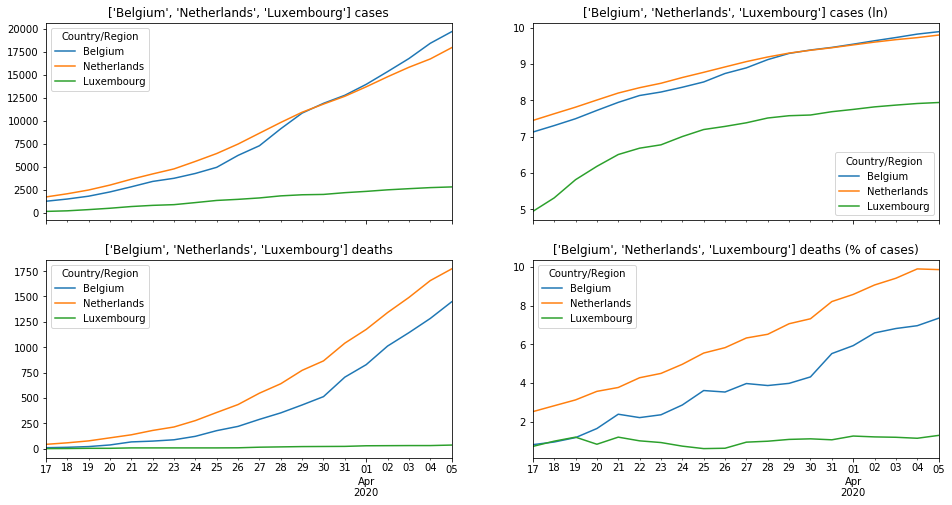

In [198]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-01,1446,4863,4947
2020-04-02,1518,5147,5568
2020-04-03,1615,5370,6131
2020-04-04,1882,5550,6443
2020-04-05,1927,5687,6830


Country/Region,Finland,Norway,Sweden
2020-04-01,17,44,239
2020-04-02,19,50,308
2020-04-03,20,59,358
2020-04-04,25,62,373
2020-04-05,28,71,401


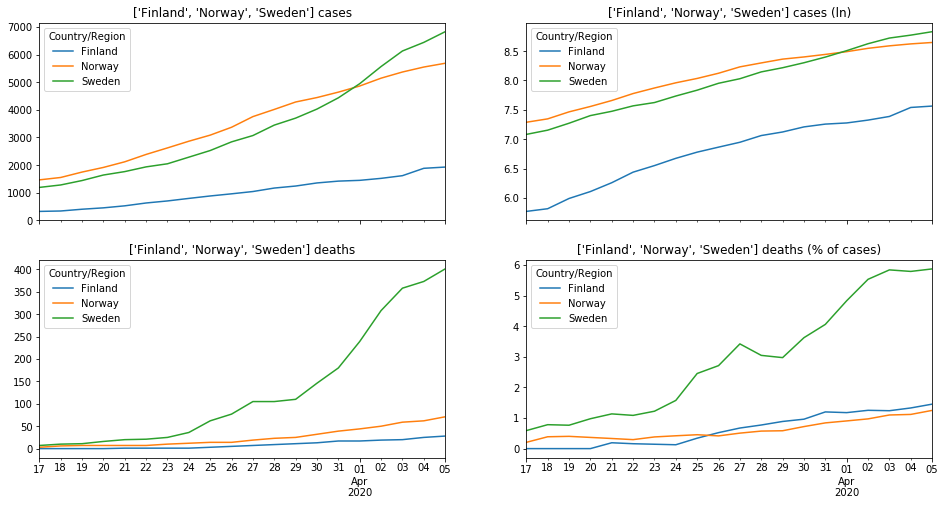

In [214]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


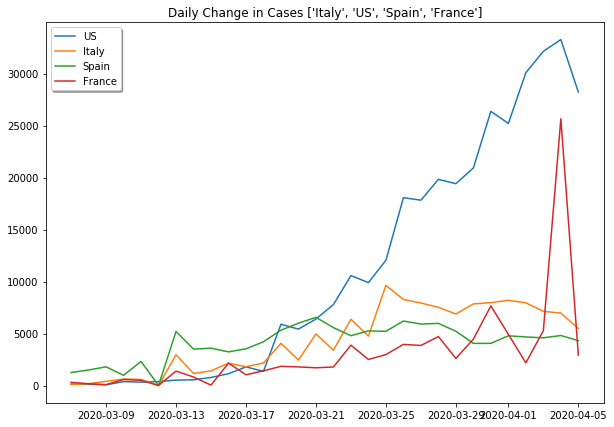

Country/Region,US,Spain,Italy,France
2020-04-01,25200.0,8195.0,4782.0,4922.0
2020-04-02,30081.0,7947.0,4668.0,2180.0
2020-04-03,32133.0,7134.0,4585.0,5273.0
2020-04-04,33264.0,6969.0,4805.0,25646.0
2020-04-05,28222.0,5478.0,4316.0,2925.0


In [200]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05
Country/Region,,,,,,,,,,
US,83757.0,102324.0,121340.0,141390.0,163622.0,187784.0,214999.0,244137.0,275963.0,307169.0
Spain,57673.0,65580.0,73021.0,80434.0,87996.0,95999.0,104035.0,111794.0,119144.0,125671.0
Italy,80491.0,86520.0,92220.0,97300.0,101740.0,106035.0,110536.0,115214.0,119900.0,124469.0
Germany,44044.0,50835.0,56887.0,62225.0,66929.0,72188.0,78158.0,84608.0,90682.0,95791.0
France,29518.0,33686.0,37405.0,41328.0,46235.0,51915.0,56835.0,60960.0,71993.0,83274.0
China,81780.0,81893.0,82006.0,82106.0,82200.0,82279.0,82357.0,82435.0,82495.0,82552.0
Iran,29585.0,32382.0,35350.0,38404.0,41470.0,44564.0,47555.0,50415.0,53131.0,55717.0
United Kingdom,12066.0,14623.0,17279.0,19848.0,22571.0,25933.0,29840.0,34242.0,38446.0,43201.0
Turkey,3920.0,5576.0,7439.0,9149.0,11192.0,13346.0,15782.0,18245.0,20997.0,23975.0


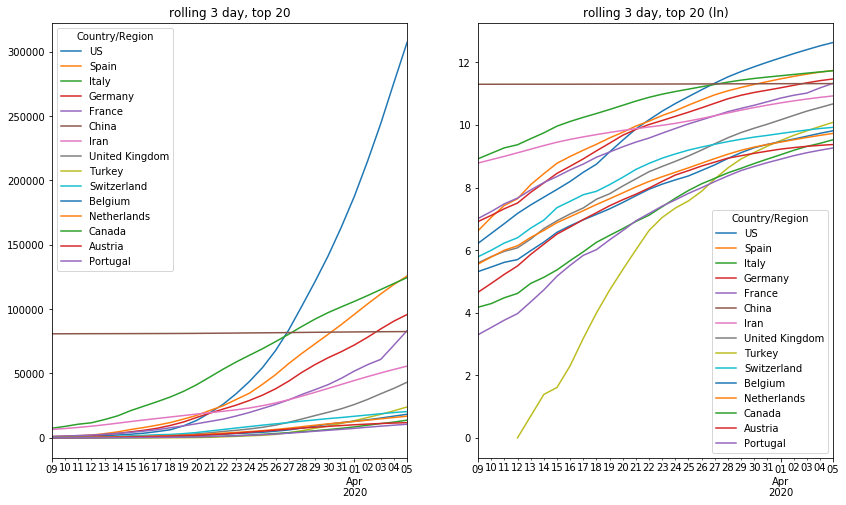

In [201]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [222]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.head(), dfc_g.tail(1).transpose())  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region')

df_gmerged


,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,4.064527e+08
113,Caribbean small states,CSS,2016,7.245472e+06
170,Central Europe and the Baltics,CEB,2016,1.029741e+08
227,Early-demographic dividend,EAR,2016,3.170542e+09
284,East Asia & Pacific,EAS,2016,2.296786e+09


,2020-04-05
Country/Region,
US,337072
Spain,131646
Italy,128948
Germany,100123
France,93773
...,...
Malawi,4
Burundi,3
Papua New Guinea,1


,Country/Region,2020-04-05 00:00:00,Country Code,Year,Value
0,Spain,131646,ESP,2016,4.644396e+07
1,Italy,128948,ITA,2016,6.060059e+07
2,Germany,100123,DEU,2016,8.266768e+07
3,France,93773,FRA,2016,6.689611e+07
4,China,82602,CHN,2016,1.378665e+09
...,...,...,...,...,...
150,Malawi,4,MWI,2016,1.809158e+07
151,Burundi,3,BDI,2016,1.052412e+07
152,Papua New Guinea,1,PNG,2016,8.084991e+06
153,South Sudan,1,SSD,2016,1.223073e+07


# Emerging Markets (>100 cases)

In [ ]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

In [ ]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
